Let's try to replicate the following R code / visualizations in Python:

https://blakocha.github.io/DAR2025/Notes20251117.html

In [ ]:
# pip install kagglehub

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhilash04/fathersandsonheight")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\lab821-17\.cache\kagglehub\datasets\abhilash04\fathersandsonheight\versions\1


In [14]:
import pandas as pd
import os

csv_path = os.path.join(path, "Pearson.txt")  # filename may vary
df = pd.read_csv(csv_path, sep="\t")

print(df.head())

   Father   Son
0    65.0  59.8
1    63.3  63.2
2    65.0  63.3
3    65.8  62.8
4    61.1  64.3


In [8]:
# pip install plotnine

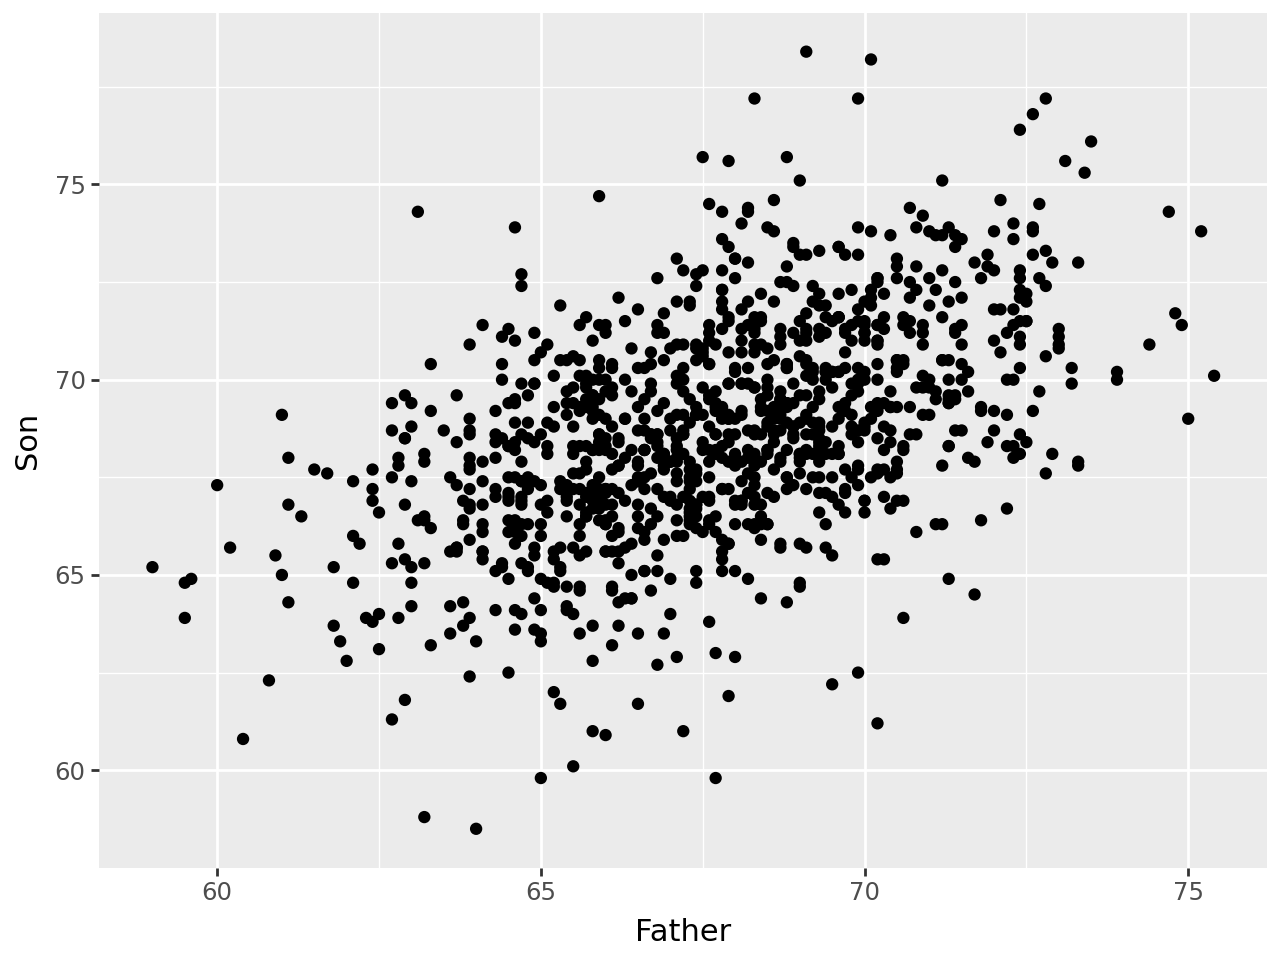

In [19]:
from plotnine import *

ggplot(data = df, mapping = aes(x = "Father", y = "Son")) + geom_point()